In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_excel("C:/Users/webde/Downloads/world-data.xlsx", header=None,
                  names = ['Country', 'Population', 'Gdp', 'Happiness', 'Democracy', 'Inequality'])
print("Dataframe Shape", df.shape)
print("DataFrame Columns", df.columns)
df.info()

Dataframe Shape (108, 6)
DataFrame Columns Index(['Country', 'Population', 'Gdp', 'Happiness', 'Democracy', 'Inequality'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     108 non-null    object 
 1   Population  108 non-null    float64
 2   Gdp         108 non-null    float64
 3   Happiness   108 non-null    float64
 4   Democracy   108 non-null    float64
 5   Inequality  108 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.2+ KB


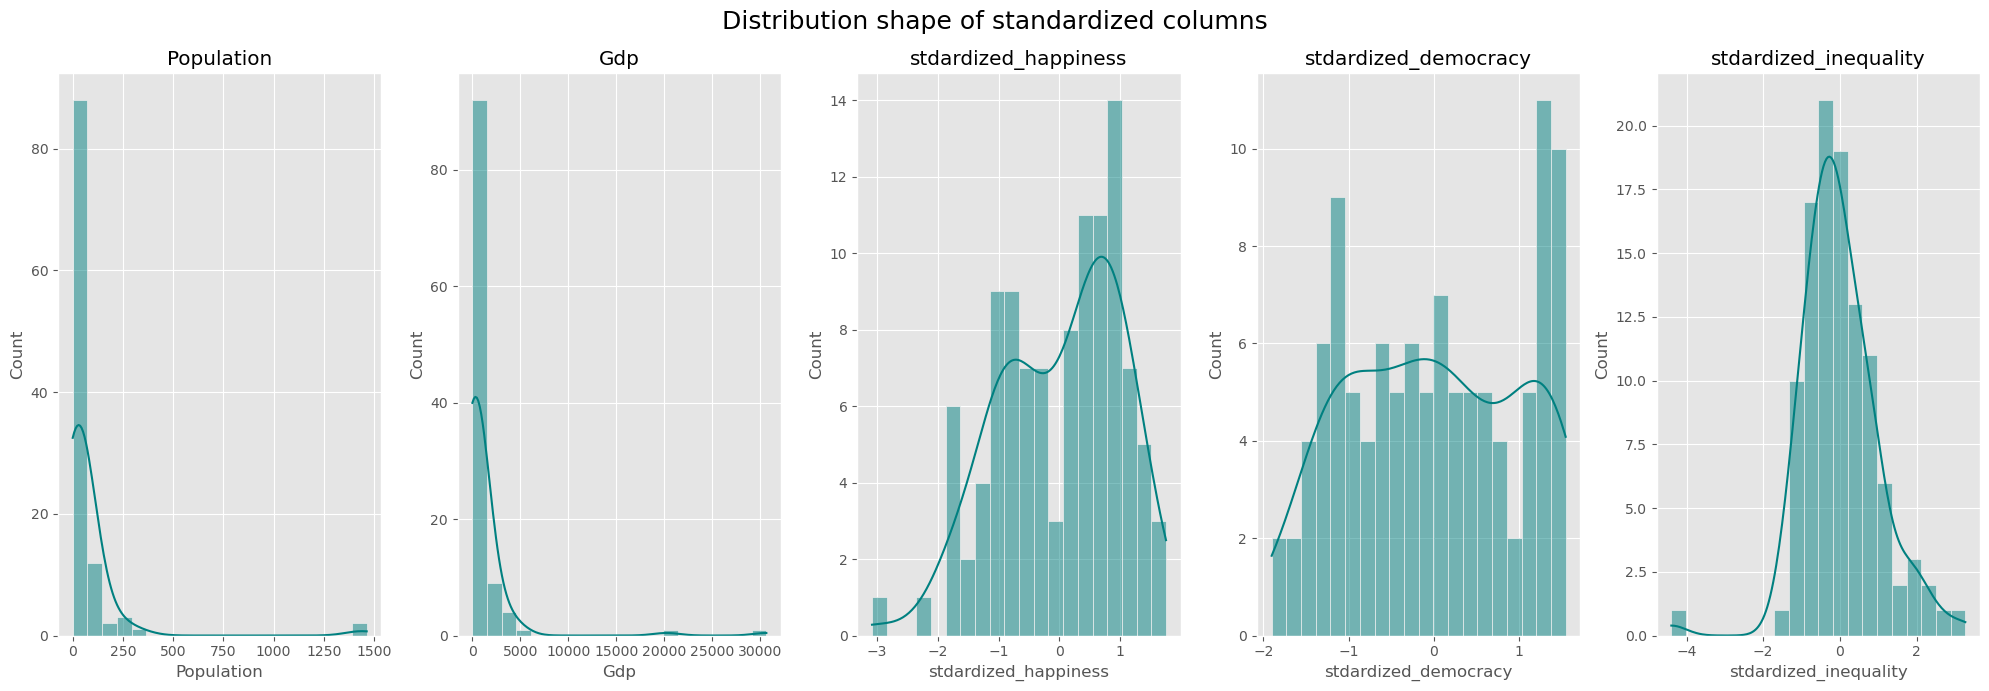

In [4]:
named_df = df.copy()
named_df['stdardized_happiness'] = ((named_df['Happiness']-named_df['Happiness'].mean())/(named_df['Happiness'].std()))
named_df['stdardized_democracy'] = ((named_df['Democracy']-named_df['Democracy'].mean())/(named_df['Democracy'].std()))
named_df['stdardized_inequality'] = ((named_df['Inequality']-named_df['Inequality'].mean())/(named_df['Inequality'].std()))

# Select only the standardized columns for plotting
selected_cols = named_df[['Population', 'Gdp','stdardized_happiness', 'stdardized_democracy', 'stdardized_inequality']]
fig, axes = plt.subplots(1, len(selected_cols.columns), figsize=(20, 7))
for idx, col in enumerate(selected_cols.columns):
	sns.histplot(data=selected_cols, x=col, bins=20, color='teal', kde=True, ax=axes[idx])
	axes[idx].set_title(col)
plt.suptitle('Distribution shape of standardized columns', fontsize=18)
plt.tight_layout()
plt.show()

In [5]:
print(round(named_df.tail(),2))

        Country  Population     Gdp  Happiness  Democracy  Inequality  \
103  mauritania        5.32   11.95       4.51       0.14        32.0   
104     albania        2.78   29.90       5.30       0.40        29.4   
105     surinam        0.64    4.50       6.27       0.64        39.2   
106      greece       10.27  282.10       5.93       0.49        32.9   
107     uruguay        3.39   85.10       6.61       0.77        40.6   

     stdardized_happiness  stdardized_democracy  stdardized_inequality  
103                 -0.84                 -1.55                  -0.53  
104                 -0.21                 -0.57                  -0.85  
105                  0.57                  0.34                   0.35  
106                  0.30                 -0.23                  -0.42  
107                  0.84                  0.83                   0.52  


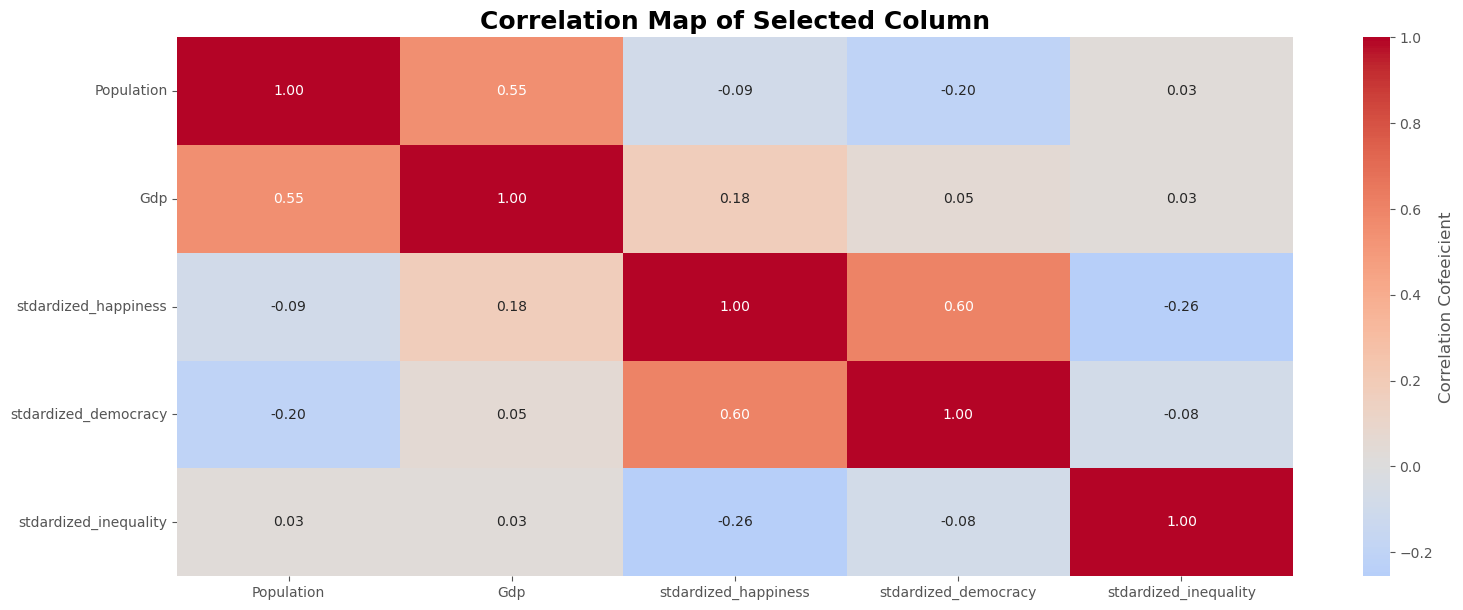

In [6]:
plt.figure(figsize =(18,7))
sns.heatmap(selected_cols.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f',
            cbar_kws={'label': 'Correlation Cofeeicient'})
plt.title("Correlation Map of Selected Column", fontsize=18, fontweight='bold')
plt.show()

In [7]:
import statsmodels.formula.api as smf
formula = 'Gdp~Population+stdardized_happiness+stdardized_inequality'
reg = smf.ols(formula, data=named_df).fit()
print("Regression Results:\n")
display(reg.summary())

Regression Results:



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gdp   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     18.98
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           6.86e-10
Time:                        16:00:17   Log-Likelihood:                -1012.8
No. Observations:                 108   AIC:                             2034.
Df Residuals:                     104   BIC:                             2044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               328.8729    298.887      1.100      0.274    -263.832     921.578
Population               10.1835      1.425      7.146      0.000       7.357      13.010
stdardized_happiness    871.8036    292.628      2.979      0.004     291.512    1452.095
stdardized_inequality   253.3148    291.646      0.869      0.387    -325.031     831.660
==============================================================================
Omnibus:                      180.387   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16661.202
Skew:                           6.423   Prob(JB):                         0.00
Kurtosis:                      62.477   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn.linear_model import LinearRegression
X = named_df[['Population', 'stdardized_happiness','stdardized_inequality']]
y = named_df['Gdp']
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

table_form = pd.DataFrame({
	'Country': named_df['Country'].str.capitalize(),
 'Actual': y,
 'Predicted': y_pred,
 'Error (%)': 100*(y_pred - y/y)
})
all = table_form.sort_values('Actual')
display(round(all, 2))

,Country,Actual,Predicted,Error (%)
49,Gambia,2.70,-313.01,-31400.91
105,Surinam,4.50,921.57,92056.62
68,Eswatini,5.20,-529.67,-53067.44
47,Malawi,11.30,-874.69,-87569.18
103,Mauritania,11.95,-484.72,-48572.03
...,...,...,...,...
4,India,4130.00,14206.74,1420573.52
3,Japan,4280.00,1853.00,185199.93
2,Germany,5010.00,1894.61,189360.78
1,China,20230.00,15016.41,1501540.65


In [9]:
# Model validation parameters
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
r2 = r2_score(y, y_pred)
print("R-Squared", round(r2,3))
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)*100
print("Mean Absolute Percentage Error (MAPE)", round(mape,2))
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
rmpse = np.sqrt(np.mean(((y - y_pred)/y)**2))*100
print("Root Mean Squared Percentage Error", round(rmpse,2))

R-Squared 0.354
Mean Absolute Percentage Error (MAPE) 1116.85
Root Mean Squared Percentage Error 2992.02


In [10]:
log_gdp = np.log(named_df['Gdp'])
formula = 'log_gdp~Population+stdardized_happiness+stdardized_inequality'
log_reg = smf.ols(formula, data=named_df).fit()
print("Log Regression Results:\n")
display(log_reg.summary())

Log Regression Results:



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_gdp   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           2.92e-16
Time:                        16:00:18   Log-Likelihood:                -176.12
No. Observations:                 108   AIC:                             360.2
Df Residuals:                     104   BIC:                             371.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.0065      0.129     38.791      0.000       4.751       5.262
Population                0.0042      0.001      6.843      0.000       0.003       0.005
stdardized_happiness      1.0403      0.126      8.232      0.000       0.790       1.291
stdardized_inequality    -0.0073      0.126     -0.058      0.954      -0.257       0.242
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.883
Skew:                          -0.295   Prob(JB):                        0.390
Kurtosis:                       3.265   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# prediction and model validation - log model
log_y = log_gdp
log_model = LinearRegression()
log_model.fit(X,log_y)
log_y_pred = log_model.predict(X)

table_form = pd.DataFrame({
	'Country': named_df['Country'].str.capitalize(),
 'Actual': log_y,
 'Predicted': log_y_pred,
 'Error (%)': 100*(log_y_pred - log_y/log_y) 
})
all = table_form.sort_values('Actual')
display(round(all,2))

,Country,Actual,Predicted,Error (%)
49,Gambia,0.99,4.13,312.51
105,Surinam,1.50,5.60,460.02
68,Eswatini,1.65,3.28,227.88
47,Malawi,2.42,3.31,231.38
103,Mauritania,2.48,4.16,315.85
...,...,...,...,...
4,India,8.33,9.91,891.31
3,Japan,8.36,5.95,494.52
2,Germany,8.52,6.36,535.77
1,China,9.91,11.31,1031.35


In [14]:
r2 = r2_score(log_y, log_y_pred)
print("R-Squared (log model)", round(r2,3))
mae = mean_absolute_error(log_y, log_y_pred)
print("Mean Absolute Error (MAE)", round(mae,3))
mape = mean_absolute_percentage_error(log_y, log_y_pred)*100
print("Mean Absolute Percentage Error (MAPE)", round(mape,2))
mse = mean_squared_error(log_y, log_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error", round(rmse,3))
rmpse = np.sqrt(np.mean(((log_y - log_y_pred)/log_y)**2))*100
print("Root Mean Percentage Squared Error", round(rmpse,2))

R-Squared (log model) 0.514
Mean Absolute Error (MAE) 0.982
Mean Absolute Percentage Error (MAPE) 24.41
Root Mean Squared Error 1.236
Root Mean Percentage Squared Error 47.47
